# FINAL PROJECT - SOCIAL MEDIA - AML3204

## 1.  IMPORTING LIBRARIES

In [ ]:
## Basic libraries
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import datetime
## Libraries for the models
import torch
import numpy as np
from torch.autograd import Variable
## Libraries for Tensor flow
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
## Libraries to EDA
import seaborn as sns
import matplotlib.pyplot as plt
## importing train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
####
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from tqdm.notebook import tqdm

## 2. READING DATA

### 2.1  Dataset for Ratings

In [ ]:
# Reading data to get Ratings
head = ["user_id","item_id","rating","timestamp"]
df_rating = pd.read_csv("u.data",names=head,sep="\t")

In [ ]:
df_rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
np.sort( df_rating.user_id.unique() )

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
np.sort( df_rating.item_id.unique() )

array([   1,    2,    3, ..., 1680, 1681, 1682])

In [ ]:
np.sort( df_rating.rating.unique() )

array([1, 2, 3, 4, 5])

In [ ]:
df_rating["datetime"] = df_rating["timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [ ]:
df_pivoted = df_rating.pivot( index="user_id" , columns="item_id" , values="rating" )
df_pivoted

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_rating.loc[ df_rating["user_id"] == 1 ].sort_values(by = "item_id").head(10)

,user_id,item_id,rating,timestamp,datetime
32236,1,1,5,874965758,1997-09-22 22:02:38
23171,1,2,3,876893171,1997-10-15 05:26:11
83307,1,3,4,878542960,1997-11-03 07:42:40
62631,1,4,3,876893119,1997-10-15 05:25:19
47638,1,5,3,889751712,1998-03-13 01:15:12
5533,1,6,5,887431973,1998-02-14 04:52:53
70539,1,7,4,875071561,1997-09-24 03:26:01
31650,1,8,1,875072484,1997-09-24 03:41:24
20175,1,9,5,878543541,1997-11-03 07:52:21
13542,1,10,3,875693118,1997-10-01 08:05:18


In [ ]:
df_rating.loc[ df_rating["user_id"] == 940 ].sort_values(by = "item_id").head(10)

,user_id,item_id,rating,timestamp,datetime
72987,940,4,2,885922040,1998-01-27 17:27:20
97515,940,7,4,885921597,1998-01-27 17:19:57
69670,940,8,5,885921577,1998-01-27 17:19:37
78057,940,9,3,885921687,1998-01-27 17:21:27
89279,940,12,4,885921979,1998-01-27 17:26:19
67014,940,14,3,885921710,1998-01-27 17:21:50
84316,940,47,3,885921758,1998-01-27 17:22:38
87299,940,50,4,885921542,1998-01-27 17:19:02
70035,940,56,5,885921577,1998-01-27 17:19:37
67362,940,66,4,885922016,1998-01-27 17:26:56


In [ ]:
df_rating.isnull().sum()

,0
user_id,0
item_id,0
rating,0
timestamp,0
datetime,0


### 2.2 Dataset for Movies

In [ ]:
columns = ["item_id" , "movie_title" , "release_date" , "video_release_date" , "IMDb_URL" , "unknown" , "Action" ,
           "Adventure" , "Animation" , "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
           "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" , "Thriller" , "War" , "Western"]
df_movies = pd.read_csv( "u.item" , names = columns , encoding = "cp1252" , delimiter = "|" )

In [ ]:
df_movies

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print( ' The dimensions of movies dataframe are : ' , df_movies.shape )

 The dimensions of movies dataframe are :  (1682, 24)


In [ ]:
print( ' The dimensions of ratings dataframe are : ' , df_rating.shape )

 The dimensions of ratings dataframe are :  (100000, 5)


## 3. PERFORMING EXPLORATORY DATA ANALISYS

### 3.A For df_ratings

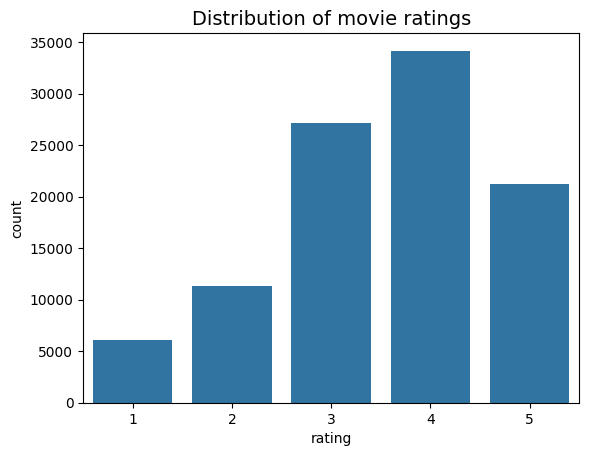

In [ ]:
## Count of ratings
sns.countplot( df_rating , x = "rating" )
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

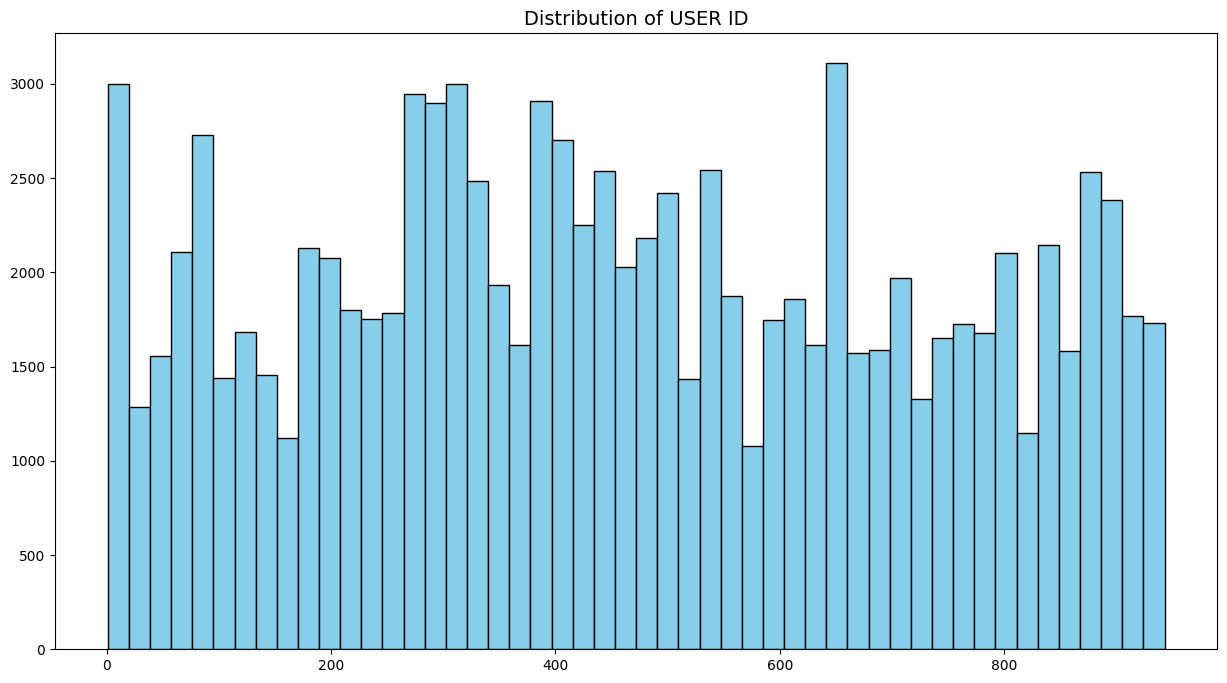

In [ ]:
plt.figure(figsize=(15, 8))
# Create a histogram plot for the 'user_id' column
plt.hist( df_rating["user_id"] , bins=50 , color='skyblue' , edgecolor = "black" )
plt.title("Distribution of USER ID", fontsize=14)
plt.show()

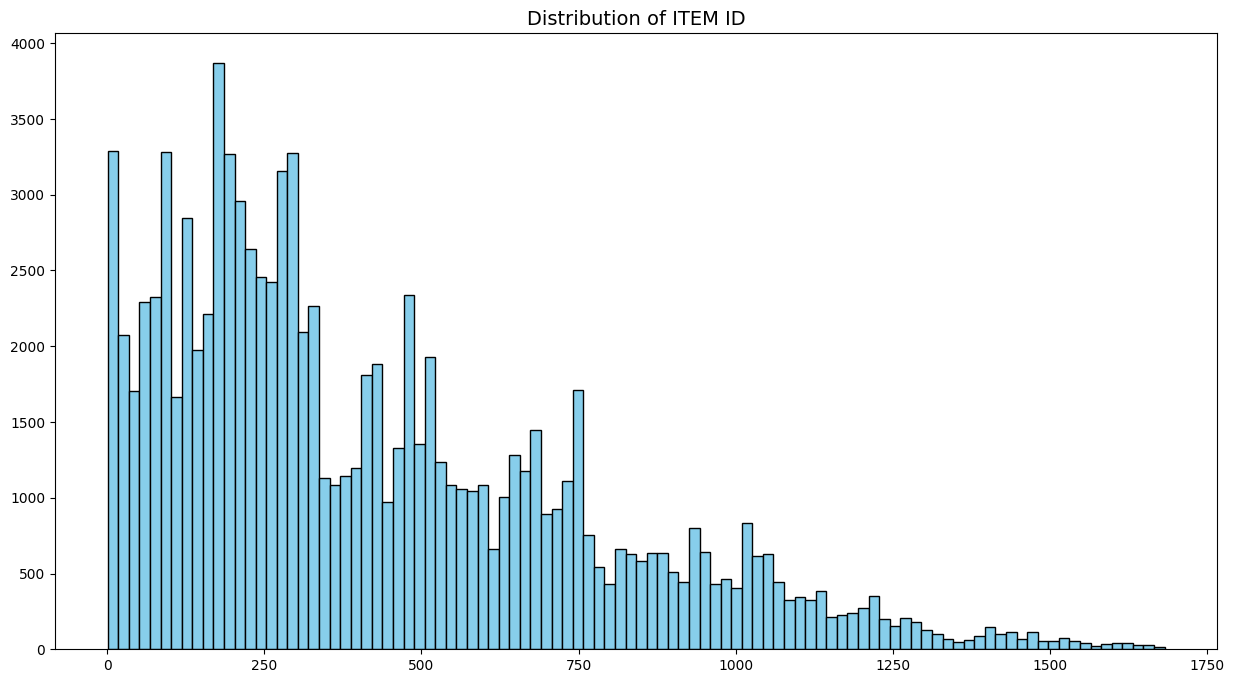

In [ ]:
plt.figure(figsize=(15, 8))
# Create a histogram plot for the 'item_id' column
plt.hist( df_rating["item_id"] , bins=100 , color='skyblue' , edgecolor = "black" )
plt.title("Distribution of ITEM ID", fontsize=14)
plt.show()

### 3.B For df_movies

In [ ]:
counts = df_movies.loc[0:,"unknown":].sum()

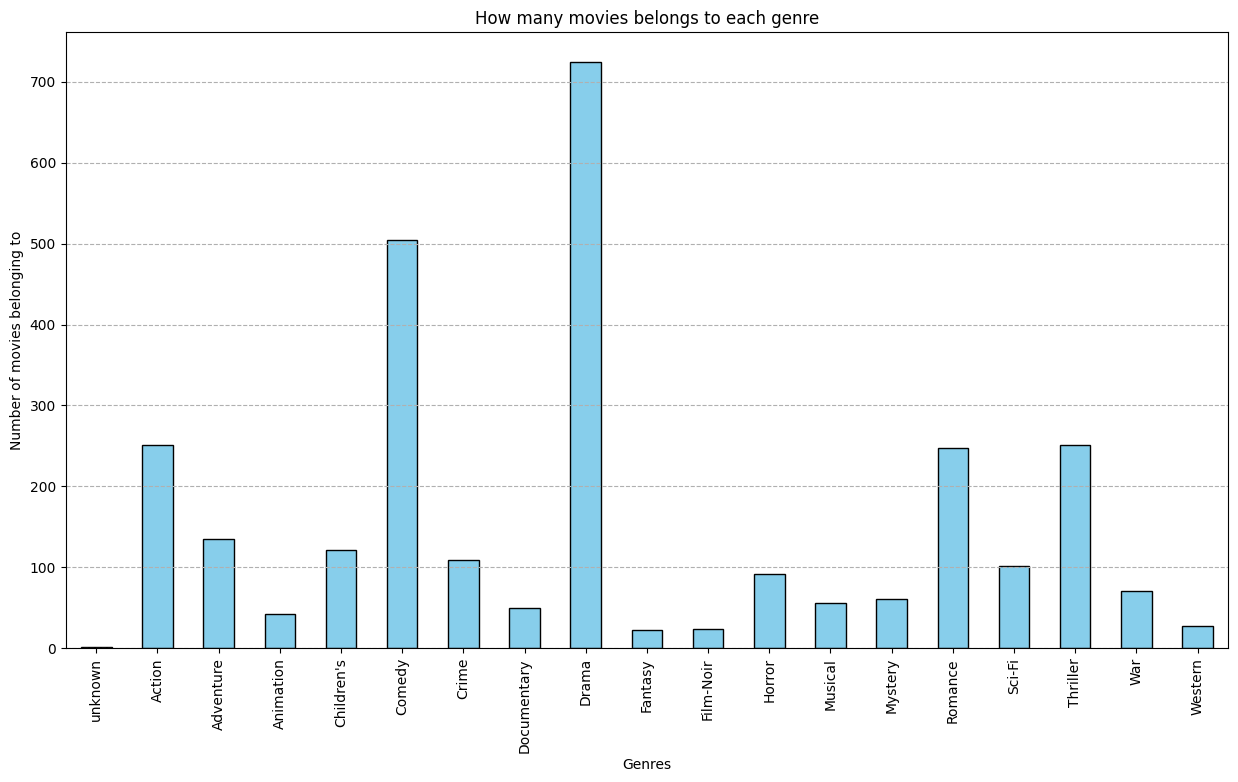

In [ ]:
# Plot the counts
plt.figure(figsize=(15, 8))
counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('How many movies belongs to each genre')
plt.xlabel('Genres')
plt.ylabel('Number of movies belonging to')

# Show the plot
plt.xticks( rotation = 90 )
plt.grid( axis = 'y' , linestyle = '--' )
plt.show()

## 4. GETTING THE SUB - SET TO VALIDATE THE RESULTS

In [ ]:
df_rating_test = df_rating.sort_values( "rating" , ascending=False ).head(10)

In [ ]:
df_rating_test

,user_id,item_id,rating,timestamp,datetime
28336,64,183,5,889737914,1998-03-12 21:25:14
16000,213,121,5,878870940,1997-11-07 02:49:00
28426,286,707,5,877531975,1997-10-22 14:52:55
38655,94,518,5,891720950,1998-04-04 20:15:50
16022,108,10,5,879879834,1997-11-18 19:03:54
16021,331,81,5,877196702,1997-10-18 17:45:02
38654,363,172,5,891495711,1998-04-02 05:41:51
91519,617,192,5,883788900,1998-01-03 00:55:00
46578,694,199,5,875728435,1997-10-01 17:53:55
84851,801,332,5,890332719,1998-03-19 18:38:39


In [ ]:
df_rating_test.shape

(10, 5)

In [ ]:
df_rating_test_extended = df_rating_test.copy()

In [ ]:
for item_ids in df_rating_test_extended["item_id"]:
    movie_name = df_movies.loc[ df_movies["item_id"] == item_ids ]["movie_title"].values[0]
    df_rating_test_extended.loc[df_rating_test_extended['item_id'] == item_ids, 'movie_name'] = movie_name

In [ ]:
df_rating_test_extended

,user_id,item_id,rating,timestamp,datetime,movie_name
28336,64,183,5,889737914,1998-03-12 21:25:14,Alien (1979)
16000,213,121,5,878870940,1997-11-07 02:49:00,Independence Day (ID4) (1996)
28426,286,707,5,877531975,1997-10-22 14:52:55,Enchanted April (1991)
38655,94,518,5,891720950,1998-04-04 20:15:50,Miller's Crossing (1990)
16022,108,10,5,879879834,1997-11-18 19:03:54,Richard III (1995)
16021,331,81,5,877196702,1997-10-18 17:45:02,"Hudsucker Proxy, The (1994)"
38654,363,172,5,891495711,1998-04-02 05:41:51,"Empire Strikes Back, The (1980)"
91519,617,192,5,883788900,1998-01-03 00:55:00,Raging Bull (1980)
46578,694,199,5,875728435,1997-10-01 17:53:55,"Bridge on the River Kwai, The (1957)"
84851,801,332,5,890332719,1998-03-19 18:38:39,Kiss the Girls (1997)


In [ ]:
df_rating_test_extended.shape

(10, 6)

In [ ]:
## Removing values from df_rating by the index in the testsub-dataset
df_rating_train = df_rating.drop( df_rating_test.index )

In [ ]:
df_rating.shape

(100000, 5)

In [ ]:
df_rating_train.shape

(99990, 5)

## 5. ANALYSING THE SPARSE MATRIX

In [ ]:
# Movie ID to movie name mapping
movie_names = df_movies.set_index('item_id')['movie_title'].to_dict()

In [ ]:
# Getting the number of users and items from df_rating
n_users = len( df_rating_train.user_id.unique() )
n_items = len( df_rating_train.item_id.unique() )
print( "Number of unique users:"  , n_users )
print( "Number of unique movies:" , n_items )
print( "The full rating matrix will have:" , n_users * n_items , 'elements.' )
print( '----------' )
print( "Number of ratings:", len( df_rating_train ) )
print( "Therefore: " , len( df_rating_train ) / ( n_users * n_items ) * 100 , '% of the matrix is filled.' )
### Analizing the sparse matrix
print( "We have an incredibly sparse matrix to work with here." )
print( "And... as you can imagine, as the number of users and products grow, the number of elements will increase by n*2" )
print( "We'll need a lot of memory to work with global scale... storing a full matrix in memory would be a challenge." )
print( "One advantage is that matrix factorization can realize the rating matrix implicitly, thus we don't need all the data" )

Number of unique users: 943
Number of unique movies: 1682
The full rating matrix will have: 1586126 elements.
----------
Number of ratings: 99990
Therefore:  6.30403889728811 % of the matrix is filled.
We have an incredibly sparse matrix to work with here.
And... as you can imagine, as the number of users and products grow, the number of elements will increase by n*2
We'll need a lot of memory to work with global scale... storing a full matrix in memory would be a challenge.
One advantage is that matrix factorization can realize the rating matrix implicitly, thus we don't need all the data


## 6. GETTING THE TRAIN AND TEST SUBDATASET

### 6.1 GETTING A COPY OF THE DATASET

In [ ]:
df_rating_0 = df_rating_train.copy()

### 6.2 ENCODING USER AND ITEM VALUES

In [ ]:
def encoding(val):
    return val - 1
def decoding(val):
    return val + 1
# Encode user and item IDs
df_rating_0['user_id'] = df_rating_0['user_id'].apply( encoding )
df_rating_0['item_id'] = df_rating_0['item_id'].apply( encoding )

### 6.3 SPLITTING THE DATASET

In [ ]:
df_rating_0_train , df_rating_0_test = train_test_split( df_rating_0 , test_size = 0.001 , random_state = 110 )

In [ ]:
df_rating_0_test.shape

(100, 5)

In [ ]:
df_rating_0_train.shape

(99890, 5)

## 7. DEFINNING THE MODEL IN TENSOR FLOW

In [ ]:
# Extract the number of users and items
num_users = df_rating_0['user_id'].nunique()
num_items = df_rating_0['item_id'].nunique()

In [ ]:
num_users

943

In [ ]:
num_items

1682

In [ ]:
latent_dim = 8  # Number of latent factors

In [ ]:
## Definning the Model in Tensor Flow
def creating_model_TF( num_users , num_items , latent_dim ):
    # User input and embedding
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=latent_dim, name='user_embedding')(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=latent_dim, name='item_embedding')(item_input)

    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)

    # Concatenate user and item vectors
    concatenated = Concatenate()([user_vec, item_vec])
    # Add hidden layers
    dense_1 = Dense(128, activation='relu')(concatenated)
    dense_2 = Dense(64, activation='relu')(dense_1)
    output  = Dense(1, activation='linear')(dense_2)

    model = Model(inputs=[user_input, item_input], outputs=output)
    return model

## 8. DEFINING THE FUNCTIONS TO GET RECOMENDATIONS

In [ ]:
def getting_embedings_cosine( item , embeddings , number ):
    # Compute cosine similarity between item 4 and all other items
    #print(embeddings)
    item_vector = embeddings[ item ]
    cosine_similarities = cosine_similarity([item_vector], embeddings)[0]
    cosine_similarities[ item ] = -1
    top_N_similar_item_ids = np.argsort(cosine_similarities)[-number:][::-1]
    return top_N_similar_item_ids

In [ ]:
def keep_last_occurrence(arr):
    seen   = set()
    result = []
    # Traverse the array from end to start
    for item in (arr):
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

In [ ]:
####
# Initialize the reconstructed line
def factors_users( model , user_val , num_items ):
    ####
    reconstructed_line = np.zeros( ( num_items , 2 ) )
    ####
    list_user = [ encoding(user_val) ]
    # Use the trained model to predict each user-item interaction
    for user_id in list_user :
        for item_id in range( num_items ):
            # Predict the rating for each user-item pair
            predicted_rating = model.predict( [ np.array([ user_id ]) , np.array([ item_id ]) ] , verbose = 0 )
            reconstructed_line[ item_id , 0 ] = predicted_rating[0][0]
            reconstructed_line[ item_id , 1 ] = item_id
    ####
    # Sort by the first column
    sorted_arr = sorted( reconstructed_line , key=lambda x: x[0] , reverse = True )
    return sorted_arr

In [ ]:
def recommend_items( num , sorted_arr , item_embeddings , df_movies ):
    recomended_items = []
    arrays_movie_nam = []
    n = 15
    for i in range(n):
        ### 1 getting the maximun 6
        item_id = sorted_arr[i][1]
        array_out = getting_embedings_cosine( int( item_id ) , item_embeddings , 4 ) #n -i
        recomended_items.extend( array_out )
    ###
    original_array = recomended_items
    cleaned_array = keep_last_occurrence(original_array)
    recommended_items = cleaned_array[0:num]
    for item in recommended_items:
        movie_id = df_movies.loc[ df_movies["item_id"] == decoding(item) ]["movie_title"].values
        #print( movie_id[0] )
        arrays_movie_nam.append( movie_id[0] )
    return arrays_movie_nam

## 9. SHOWING THE DATASET TO VALIDATE THE MODEL

In [ ]:
df_rating_test_extended

,user_id,item_id,rating,timestamp,datetime,movie_name
28336,64,183,5,889737914,1998-03-12 21:25:14,Alien (1979)
16000,213,121,5,878870940,1997-11-07 02:49:00,Independence Day (ID4) (1996)
28426,286,707,5,877531975,1997-10-22 14:52:55,Enchanted April (1991)
38655,94,518,5,891720950,1998-04-04 20:15:50,Miller's Crossing (1990)
16022,108,10,5,879879834,1997-11-18 19:03:54,Richard III (1995)
16021,331,81,5,877196702,1997-10-18 17:45:02,"Hudsucker Proxy, The (1994)"
38654,363,172,5,891495711,1998-04-02 05:41:51,"Empire Strikes Back, The (1980)"
91519,617,192,5,883788900,1998-01-03 00:55:00,Raging Bull (1980)
46578,694,199,5,875728435,1997-10-01 17:53:55,"Bridge on the River Kwai, The (1957)"
84851,801,332,5,890332719,1998-03-19 18:38:39,Kiss the Girls (1997)


In [ ]:
#def making_output_dataset():
df_ra_extended_pivoted = df_rating_test_extended.pivot_table( index = "rating" , columns = "movie_name" , values = "item_id" )
# Ensure the columns maintain their original order from the DataFrame
df_ra_extended_pivoted = df_ra_extended_pivoted[[col for col in df_rating_test_extended['movie_name'].unique()]]

In [ ]:
df_ra_extended_pivoted

movie_name,Alien (1979),Independence Day (ID4) (1996),Enchanted April (1991),Miller's Crossing (1990),Richard III (1995),"Hudsucker Proxy, The (1994)","Empire Strikes Back, The (1980)",Raging Bull (1980),"Bridge on the River Kwai, The (1957)",Kiss the Girls (1997)
rating,,,,,,,,,,
5,183.0,121.0,707.0,518.0,10.0,81.0,172.0,192.0,199.0,332.0


## 10. DEFINING THE TRAIN AND TEST SUBDATASET FOR ALL THE TESTS

In [ ]:
## Getting user, item and ratings for train subdataset
train_user   = df_rating_0_train['user_id'].values
train_item   = df_rating_0_train['item_id'].values
train_rating = df_rating_0_train['rating'].values

In [ ]:
# Prepare test inputs
test_user   = df_rating_0_test['user_id'].values
test_item   = df_rating_0_test['item_id'].values
test_rating = df_rating_0_test['rating'].values

## 11. GETTING RESULTS FOR 20 LATENT FACTORS

In [ ]:
MODEL_20 = creating_model_TF( num_users , num_items , 20 )

In [ ]:
MODEL_20.compile(optimizer='adam' , loss='mse')

In [ ]:
MODEL_20.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 20)          │         18,860 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_embedding            │ (None, 1, 20)          │         33,640 │ item_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 20)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 20)             │              0 │ item_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 40)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          5,248 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 66,069 (258.08 KB)

 Trainable params: 66,069 (258.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
MODEL_20.fit([train_user, train_item], train_rating, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.7759
Epoch 2/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8785
Epoch 3/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8461
Epoch 4/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8105
Epoch 5/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7680
Epoch 6/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7420
Epoch 7/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.7161
Epoch 8/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6919
Epoch 9/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6662
Epoch 10/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.6301
Epoch 11/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6142
Epoch 12/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5848
Epoch 13/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.5575
Epoch 14/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.5388
Epoch 15/20
3122/3122 ━━

### 11.1 GETTING THE LOSS VALUE

In [ ]:
# Evaluate the model
loss = MODEL_20.evaluate([test_user, test_item], test_rating, verbose=1)
print(f'Test Loss: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.8611
Test Loss: 0.8204274773597717


### 11.2 GETTING ITEM EMBEDDING

In [ ]:
item_embedding_layer = MODEL_20.get_layer('item_embedding')

In [ ]:
# Extract the embedding weights (this will be a NumPy array)
item_embeddings = item_embedding_layer.get_weights()[0]

In [ ]:
item_embeddings.shape

(1682, 20)

### 11.3 GETTING THE VALUES TO VALIDATE THE MODEL

In [ ]:
####
dictionary_array = {}
for user_val in df_rating_test_extended["user_id"]:
    print(user_val)
    sorted_arr = factors_users( MODEL_20 , user_val , num_items )
    array_movies = recommend_items( 30 , sorted_arr , item_embeddings , df_movies )
    ## updating dictionary
    key_dict = df_rating_test_extended.loc[df_rating_test_extended["user_id"] == user_val]["movie_name"].values[0]
    dictionary_array[key_dict] = array_movies

64
213
286
94
108
331
363
617
694
801


In [ ]:
df_ra_extended_pivoted_1 = pd.DataFrame( dictionary_array )
df_full_ratings = pd.concat( [ df_ra_extended_pivoted , df_ra_extended_pivoted_1 ] , ignore_index = True )

In [ ]:
df_full_ratings

,Alien (1979),Independence Day (ID4) (1996),Enchanted April (1991),Miller's Crossing (1990),Richard III (1995),"Hudsucker Proxy, The (1994)","Empire Strikes Back, The (1980)",Raging Bull (1980),"Bridge on the River Kwai, The (1957)",Kiss the Girls (1997)
0,183.0,121.0,707.0,518.0,10.0,81.0,172.0,192.0,199.0,332.0
1,"Close Shave, A (1995)","Madness of King George, The (1994)",In the Mouth of Madness (1995),Anna (1996),Kicked in the Head (1997),"Winter Guest, The (1997)",Land and Freedom (Tierra y libertad) (1995),King of the Hill (1993),Anna (1996),Anna (1996)
2,Monty Python and the Holy Grail (1974),My Own Private Idaho (1991),Theodore Rex (1995),"Great Day in Harlem, A (1994)",Steel (1997),Friday (1995),"Return of Martin Guerre, The (Retour de Martin...","Ice Storm, The (1997)","Great Day in Harlem, A (1994)","Great Day in Harlem, A (1994)"
3,"Grand Day Out, A (1992)",Some Folks Call It a Sling Blade (1993),Suture (1993),North by Northwest (1959),Nadja (1994),"Nightmare on Elm Street, A (1984)","Return of the Pink Panther, The (1974)",Crumb (1994),North by Northwest (1959),North by Northwest (1959)
4,Santa with Muscles (1996),Antonia's Line (1995),"Adventures of Pinocchio, The (1996)",Santa with Muscles (1996),"Designated Mourner, The (1997)",Walkabout (1971),Tainted (1998),Kissed (1996),Santa with Muscles (1996),Santa with Muscles (1996)
5,Land and Freedom (Tierra y libertad) (1995),Anna (1996),Pushing Hands (1992),"Enfer, L' (1994)",Three Colors: White (1994),Unzipped (1995),"Wrong Trousers, The (1993)",City of Industry (1997),"Close Shave, A (1995)",Raiders of the Lost Ark (1981)
6,"Return of Martin Guerre, The (Retour de Martin...","Great Day in Harlem, A (1994)",For the Moment (1994),He Walked by Night (1948),"Apartment, The (1960)",Bound (1996),"Spanish Prisoner, The (1997)","Secret Agent, The (1996)",Monty Python and the Holy Grail (1974),Prefontaine (1997)
7,"Return of the Pink Panther, The (1974)",North by Northwest (1959),April Fool's Day (1986),Dead Man Walking (1995),Ladybird Ladybird (1994),Contact (1997),"Manchurian Candidate, The (1962)",Mr. Wonderful (1993),"Grand Day Out, A (1992)",Tomorrow Never Dies (1997)
8,Tainted (1998),Santa with Muscles (1996),Thinner (1996),"Fille seule, La (A Single Girl) (1995)","Sweet Hereafter, The (1997)",Heathers (1989),Blade Runner (1982),Mighty Aphrodite (1995),"Wrong Trousers, The (1993)",Terminator 2: Judgment Day (1991)
9,"Wrong Trousers, The (1993)",Late Bloomers (1996),Radioland Murders (1994),"Close Shave, A (1995)","Ice Storm, The (1997)",Clueless (1995),Bitter Sugar (Azucar Amargo) (1996),"Clockwork Orange, A (1971)","Spanish Prisoner, The (1997)",Star Trek VI: The Undiscovered Country (1991)


## 12. GETTING RESULTS FOR 30 LATENT FACTORS

In [ ]:
MODEL_30 = creating_model_TF( num_users , num_items , 30 )

In [ ]:
MODEL_30.compile(optimizer='adam' , loss='mse')

In [ ]:
MODEL_30.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 30)          │         28,290 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_embedding            │ (None, 1, 30)          │         50,460 │ item_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 30)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 30)             │              0 │ item_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 60)             │              0 │ flatten_2[0][0],       │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │          7,808 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             65 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 94,879 (370.62 KB)

 Trainable params: 94,879 (370.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
MODEL_30.fit([train_user, train_item], train_rating, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.6877
Epoch 2/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8759
Epoch 3/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8325
Epoch 4/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7910
Epoch 5/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7476
Epoch 6/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.7179
Epoch 7/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6777
Epoch 8/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.6426
Epoch 9/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6092
Epoch 10/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5719
Epoch 11/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.5394
Epoch 12/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5198
Epoch 13/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4939
Epoch 14/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4717
Epoch 15/20
3122/3122 ━━

### 12.1 GETTING THE LOSS VALUE

In [ ]:
# Evaluate the model
loss = MODEL_30.evaluate([test_user, test_item], test_rating, verbose=1)
print(f'Test Loss: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.8697
Test Loss: 0.8259483575820923


### 12.2 GETTING ITEM EMBEDDING

In [ ]:
item_embedding_layer = MODEL_30.get_layer('item_embedding')

In [ ]:
# Extract the embedding weights (this will be a NumPy array)
item_embeddings = item_embedding_layer.get_weights()[0]

In [ ]:
item_embeddings.shape

(1682, 30)

### 12.3 GETTING THE VALUES TO VALIDATE THE MODEL

In [ ]:
####
dictionary_array = {}
for user_val in df_rating_test_extended["user_id"]:
    print(user_val)
    sorted_arr = factors_users( MODEL_30 , user_val , num_items )
    array_movies = recommend_items( 30 , sorted_arr , item_embeddings , df_movies )
    ## updating dictionary
    key_dict = df_rating_test_extended.loc[df_rating_test_extended["user_id"] == user_val]["movie_name"].values[0]
    dictionary_array[key_dict] = array_movies

64
213
286
94
108
331
363
617
694
801


In [ ]:
df_ra_extended_pivoted_1 = pd.DataFrame( dictionary_array )
df_full_ratings = pd.concat( [ df_ra_extended_pivoted , df_ra_extended_pivoted_1 ] , ignore_index = True )

In [ ]:
df_full_ratings

,Alien (1979),Independence Day (ID4) (1996),Enchanted April (1991),Miller's Crossing (1990),Richard III (1995),"Hudsucker Proxy, The (1994)","Empire Strikes Back, The (1980)",Raging Bull (1980),"Bridge on the River Kwai, The (1957)",Kiss the Girls (1997)
0,183.0,121.0,707.0,518.0,10.0,81.0,172.0,192.0,199.0,332.0
1,"Sum of Us, The (1994)",Laura (1944),Blood Beach (1981),Sling Blade (1996),One Night Stand (1997),"Jungle Book, The (1994)",Mute Witness (1994),"Show, The (1995)",Home for the Holidays (1995),"Grand Day Out, A (1992)"
2,Guantanamera (1994),"Gate of Heavenly Peace, The (1995)",That Darn Cat! (1997),Amadeus (1984),Nightwatch (1997),Twelfth Night (1996),April Fool's Day (1986),Kaspar Hauser (1993),Addams Family Values (1993),"Close Shave, A (1995)"
3,"Quiet Man, The (1952)","Close Shave, A (1995)",Squeeze (1996),Lone Star (1996),"Clockwork Orange, A (1971)",Foreign Correspondent (1940),Bulletproof (1996),"Damsel in Distress, A (1937)",Dangerous Minds (1995),"Perfect Candidate, A (1996)"
4,Primary Colors (1998),Shine (1996),"Crude Oasis, The (1995)",You So Crazy (1994),For the Moment (1994),Fried Green Tomatoes (1991),Lightning Jack (1994),Aiqing wansui (1994),True Crime (1995),"Great Escape, The (1963)"
5,"Grand Day Out, A (1992)",Star Kid (1997),Mille bolle blu (1993),Star Kid (1997),"Magic Hour, The (1998)",Paradise Lost: The Child Murders at Robin Hood...,"Usual Suspects, The (1995)","Spanish Prisoner, The (1997)","Empire Strikes Back, The (1980)",Terminator 2: Judgment Day (1991)
6,"Close Shave, A (1995)",Entertaining Angels: The Dorothy Day Story (1996),"Women, The (1939)",Entertaining Angels: The Dorothy Day Story (1996),Aiqing wansui (1994),Love and Death on Long Island (1997),Tainted (1998),"Cérémonie, La (1995)",Return of the Jedi (1983),Under Siege (1992)
7,"Perfect Candidate, A (1996)",Gabbeh (1996),Switchblade Sisters (1975),Gabbeh (1996),Ed's Next Move (1996),Killer (Bulletproof Heart) (1994),"Colonel Chabert, Le (1994)","Big One, The (1997)",Raiders of the Lost Ark (1981),"Quick and the Dead, The (1995)"
8,"Great Escape, The (1963)",Cool Hand Luke (1967),One Night Stand (1997),Cool Hand Luke (1967),"Fille seule, La (A Single Girl) (1995)",Money Talks (1997),Amadeus (1984),Window to Paris (1994),"Bridge on the River Kwai, The (1957)",Clear and Present Danger (1994)
9,Rear Window (1954),Death in Brunswick (1991),Addicted to Love (1997),Rhyme & Reason (1997),Rear Window (1954),Boogie Nights (1997),"Grand Day Out, A (1992)","Beans of Egypt, Maine, The (1994)",Star Wars (1977),"Haunted World of Edward D. Wood Jr., The (1995)"


## 13. GETTING RESULTS FOR 40 LATENT FACTORS

In [ ]:
MODEL_40 = creating_model_TF( num_users , num_items , 40 )

In [ ]:
MODEL_40.compile(optimizer='adam' , loss='mse')

In [ ]:
MODEL_40.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 40)          │         37,720 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_embedding            │ (None, 1, 40)          │         67,280 │ item_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 40)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 40)             │              0 │ item_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 80)             │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         10,368 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             65 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 123,689 (483.16 KB)

 Trainable params: 123,689 (483.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
MODEL_40.fit([train_user, train_item], train_rating, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.7580
Epoch 2/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8772
Epoch 3/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8447
Epoch 4/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8054
Epoch 5/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.7599
Epoch 6/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.7160
Epoch 7/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6740
Epoch 8/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.6293
Epoch 9/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5996
Epoch 10/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5629
Epoch 11/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5305
Epoch 12/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4982
Epoch 13/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4650
Epoch 14/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4429
Epoch 15/20
3122/3122 ━

### 13.1 GETTING THE LOSS VALUE

In [ ]:
# Evaluate the model
loss = MODEL_40.evaluate([test_user, test_item], test_rating, verbose=1)
print(f'Test Loss: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.8091
Test Loss: 0.7526391744613647


### 13.2 GETTING ITEM EMBEDDING

In [ ]:
item_embedding_layer = MODEL_40.get_layer('item_embedding')

In [ ]:
# Extract the embedding weights (this will be a NumPy array)
item_embeddings = item_embedding_layer.get_weights()[0]

In [ ]:
item_embeddings.shape

(1682, 40)

### 13.3 GETTING THE VALUES TO VALIDATE THE MODEL

In [ ]:
####
dictionary_array = {}
for user_val in df_rating_test_extended["user_id"]:
    print(user_val)
    sorted_arr = factors_users( MODEL_40 , user_val , num_items )
    array_movies = recommend_items( 30 , sorted_arr , item_embeddings , df_movies )
    ## updating dictionary
    key_dict = df_rating_test_extended.loc[df_rating_test_extended["user_id"] == user_val]["movie_name"].values[0]
    dictionary_array[key_dict] = array_movies

64
213
286
94
108
331
363
617
694
801


In [ ]:
df_ra_extended_pivoted_1 = pd.DataFrame( dictionary_array )
df_full_ratings = pd.concat( [ df_ra_extended_pivoted , df_ra_extended_pivoted_1 ] , ignore_index = True )

In [ ]:
df_full_ratings

,Alien (1979),Independence Day (ID4) (1996),Enchanted April (1991),Miller's Crossing (1990),Richard III (1995),"Hudsucker Proxy, The (1994)","Empire Strikes Back, The (1980)",Raging Bull (1980),"Bridge on the River Kwai, The (1957)",Kiss the Girls (1997)
0,183.0,121.0,707.0,518.0,10.0,81.0,172.0,192.0,199.0,332.0
1,"Silence of the Lambs, The (1991)",Aparajito (1956),"Letter From Death Row, A (1998)",My Own Private Idaho (1991),Emma (1996),Tetsuo II: Body Hammer (1992),"Perfect Candidate, A (1996)","Walking Dead, The (1995)","Silence of the Lambs, The (1991)",Hard Eight (1996)
2,Golden Earrings (1947),Three Colors: Blue (1993),It's My Party (1995),Amistad (1997),Sense and Sensibility (1995),Suture (1993),My Favorite Season (1993),"Butcher Boy, The (1998)",Golden Earrings (1947),Celestial Clockwork (1994)
3,12 Angry Men (1957),Ponette (1996),Little City (1998),"Run of the Country, The (1995)",Willy Wonka and the Chocolate Factory (1971),Chungking Express (1994),Kaspar Hauser (1993),Evil Dead II (1987),12 Angry Men (1957),GoodFellas (1990)
4,Gandhi (1982),They Made Me a Criminal (1939),JLG/JLG - autoportrait de décembre (1994),Four Days in September (1997),My Man Godfrey (1936),Before Sunrise (1995),Ran (1985),"Silence of the Palace, The (Saimt el Qusur) (1...",Gandhi (1982),Nelly & Monsieur Arnaud (1995)
5,Basquiat (1996),Little City (1998),"Thin Line Between Love and Hate, A (1996)","Godfather: Part II, The (1974)",Lamerica (1994),Army of Darkness (1993),M (1931),Time Tracers (1995),Someone Else's America (1995),Beautiful Thing (1996)
6,Shine (1996),Of Love and Shadows (1994),Terminal Velocity (1994),He Walked by Night (1948),Basquiat (1996),Friday (1995),Jupiter's Wife (1994),"Road to Wellville, The (1994)",Glory (1989),They Made Me a Criminal (1939)
7,"Thin Blue Line, The (1988)",Ma vie en rose (My Life in Pink) (1997),Major Payne (1994),Cosi (1996),Trust (1990),Jimmy Hollywood (1994),Harold and Maude (1971),Dumb & Dumber (1994),Anna (1996),"Magic Hour, The (1998)"
8,"Perfect Candidate, A (1996)",Hugo Pool (1997),Celtic Pride (1996),Fargo (1996),Bob Roberts (1992),"Man in the Iron Mask, The (1998)","Big Sleep, The (1946)",Vegas Vacation (1997),He Walked by Night (1948),Akira (1988)
9,My Favorite Season (1993),Cosi (1996),Broken English (1996),"Big Bang Theory, The (1994)",My Own Private Idaho (1991),Farewell My Concubine (1993),"Shaggy Dog, The (1959)","Clockwork Orange, A (1971)",Casablanca (1942),Forrest Gump (1994)


## 14. GETTING RESULTS FOR 50 LATENT FACTORS

In [ ]:
MODEL_50 = creating_model_TF( num_users , num_items , 50 )

In [ ]:
MODEL_50.compile(optimizer='adam' , loss='mse')

In [ ]:
MODEL_50.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 50)          │         47,150 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_embedding            │ (None, 1, 50)          │         84,100 │ item_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 50)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 50)             │              0 │ item_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 100)            │              0 │ flatten_6[0][0],       │
│ (Concatenate)             │                        │                │ flatten_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 128)            │         12,928 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          8,256 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 152,499 (595.70 KB)

 Trainable params: 152,499 (595.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
MODEL_50.fit([train_user, train_item], train_rating, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.6264
Epoch 2/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8715
Epoch 3/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.8276
Epoch 4/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7789
Epoch 5/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.7337
Epoch 6/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6804
Epoch 7/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6309
Epoch 8/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5755
Epoch 9/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5357
Epoch 10/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4943
Epoch 11/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4626
Epoch 12/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.4332
Epoch 13/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4075
Epoch 14/20
3122/3122 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.3814
Epoch 15/20
3122/3122 ━━━

### 14.1 GETTING THE LOSS VALUE

In [ ]:
# Evaluate the model
loss = MODEL_50.evaluate([test_user, test_item], test_rating, verbose=1)
print(f'Test Loss: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.9417
Test Loss: 0.8846612572669983


### 14.2 GETTING ITEM EMBEDDING

In [ ]:
item_embedding_layer = MODEL_50.get_layer('item_embedding')

In [ ]:
# Extract the embedding weights (this will be a NumPy array)
item_embeddings = item_embedding_layer.get_weights()[0]

In [ ]:
item_embeddings.shape

(1682, 50)

### 14.3 GETTING THE VALUES TO VALIDATE THE MODEL

In [ ]:
####
dictionary_array = {}
for user_val in df_rating_test_extended["user_id"]:
    print(user_val)
    sorted_arr = factors_users( MODEL_50 , user_val , num_items )
    array_movies = recommend_items( 30 , sorted_arr , item_embeddings , df_movies )
    ## updating dictionary
    key_dict = df_rating_test_extended.loc[df_rating_test_extended["user_id"] == user_val]["movie_name"].values[0]
    dictionary_array[key_dict] = array_movies

64
213
286
94
108
331
363
617
694
801


In [97]:
df_ra_extended_pivoted_1 = pd.DataFrame( dictionary_array )
df_full_ratings = pd.concat( [ df_ra_extended_pivoted , df_ra_extended_pivoted_1 ] , ignore_index = True )

In [98]:
df_full_ratings

,Alien (1979),Independence Day (ID4) (1996),Enchanted April (1991),Miller's Crossing (1990),Richard III (1995),"Hudsucker Proxy, The (1994)","Empire Strikes Back, The (1980)",Raging Bull (1980),"Bridge on the River Kwai, The (1957)",Kiss the Girls (1997)
0,183.0,121.0,707.0,518.0,10.0,81.0,172.0,192.0,199.0,332.0
1,Patton (1970),Glory (1989),Mondo (1996),Patton (1970),Patton (1970),Switchblade Sisters (1975),"Spanish Prisoner, The (1997)",Two or Three Things I Know About Her (1966),Patton (1970),"Shawshank Redemption, The (1994)"
2,Schindler's List (1993),Apt Pupil (1998),Tales from the Hood (1995),Schindler's List (1993),Schindler's List (1993),"Daytrippers, The (1996)","Princess Bride, The (1987)","Sweet Hereafter, The (1997)",Schindler's List (1993),Gandhi (1982)
3,"Big Bang Theory, The (1994)","Beans of Egypt, Maine, The (1994)",Black Beauty (1994),"Big Bang Theory, The (1994)","Big Bang Theory, The (1994)","Innocents, The (1961)","Big Bang Theory, The (1994)",Aladdin and the King of Thieves (1996),"Big Bang Theory, The (1994)",To Kill a Mockingbird (1962)
4,Rear Window (1954),Manon of the Spring (Manon des sources) (1986),Tales From the Crypt Presents: Demon Knight (1...,Rear Window (1954),Rear Window (1954),"Paris, Texas (1984)",Jupiter's Wife (1994),"Whole Wide World, The (1996)",Rear Window (1954),One Flew Over the Cuckoo's Nest (1975)
5,"Spanish Prisoner, The (1997)",Patton (1970),In the Line of Fire (1993),Guantanamera (1994),"Spanish Prisoner, The (1997)",Three Colors: Blue (1993),In the Line of Fire (1993),Annie Hall (1977),"Empire Strikes Back, The (1980)",Star Wars (1977)
6,"Princess Bride, The (1987)",Schindler's List (1993),Intimate Relations (1996),A Chef in Love (1996),"Princess Bride, The (1987)",Ran (1985),Intimate Relations (1996),Manhattan (1979),Return of the Jedi (1983),"Empire Strikes Back, The (1980)"
7,Jupiter's Wife (1994),"Big Bang Theory, The (1994)",Somewhere in Time (1980),Entertaining Angels: The Dorothy Day Story (1996),Jupiter's Wife (1994),Like Water For Chocolate (Como agua para choco...,Somewhere in Time (1980),Nightwatch (1997),Love in the Afternoon (1957),Love in the Afternoon (1957)
8,Lady of Burlesque (1943),Rear Window (1954),Above the Rim (1994),Casablanca (1942),Night on Earth (1991),Girls Town (1996),Above the Rim (1994),Trust (1990),Raiders of the Lost Ark (1981),Duck Soup (1933)
9,Vertigo (1958),8 Seconds (1994),Hotel de Love (1996),Lady of Burlesque (1943),Big Night (1996),Clueless (1995),Kim (1950),Out to Sea (1997),Lady of Burlesque (1943),Real Genius (1985)
